<a href="https://colab.research.google.com/github/AI-sh1n/hello-world/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic : Machine Learning from disaster【タイタニック号：災害からの機械学習】**
**Public score : 81.3%(GCI講座14位799名中)**<br>
※使用した説明変数 : 'Fare', 'Age', 'Pclass', 'Sex', 'SibSp'<br>
※使用したアルゴリズム ： RandomForestClassifier<br>
※ハイパーパラメータ : max_depth=5, n_estimators=10

## 1．ライブラリ＆データの読み込み

In [0]:
# おまじない
import pandas as pd
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
%precision 3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 9.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=08ba9ffa59e5fa8e15fae24e04f37542f72690b9fbeecbba84c67c8681989232
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [0]:
# データの読み込み
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## 2.　データの概観・分析・前処理


### 2.1 データの概観

In [0]:
# データ数＆種類確認
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [0]:
# 見出し5行
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# 行確認(Trainデータ)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# 行確認(Testデータ)
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

変数 |定義 |備考  
---|---|---
Survived |生存したかどうか |0 = No, 1 = Yes
Pclass |チケットのクラス |1 = 1st, 2 = 2nd, 3 = 3rd
Name |名前 |
Sex |性別 |
Age	|年齢 |
SibSp |乗船していた兄弟姉妹・配偶者の数	|
Parch |乗船していた親・子供の数	|
Ticket |チケット番号	|
Fare |チケット料金	|
Cabin |キャビン番号	|
embarked |乗船した港	|C = Cherbourg, Q = Queenstown, S = Southampton

### 2.2 データの分析

In [0]:
# Trainデータ数とオブジェクトタイプの確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# Trainデータの欠損値を確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# Testデータの欠損値を確認
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

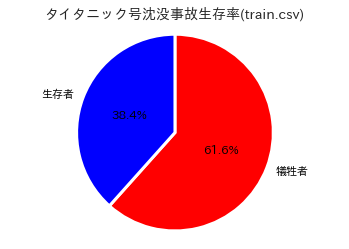

In [0]:
# 日本語化
import japanize_matplotlib
# 円グラフ(生存者の割合))
survived_values = df['Survived'].value_counts()
survived_labels = ['犠牲者','生存者']
setcolors = ['red','blue']
plt.pie(x=survived_values,labels=survived_labels,colors=setcolors,wedgeprops={'linewidth':3,'edgecolor':'white'},\
        counterclock=False,startangle=90,textprops={'color':'black','weight':'bold'},autopct='%.1f%%',pctdistance=0.5)

plt.title('タイタニック号沈没事故生存率(Train.csv)',fontsize=14) 
plt.axis('equal')
plt.show()

In [0]:
# 生存者の特徴を確認
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [0]:
# Pclassクラスごとの特徴を確認
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [0]:
# 特徴量の相関係数を確認
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


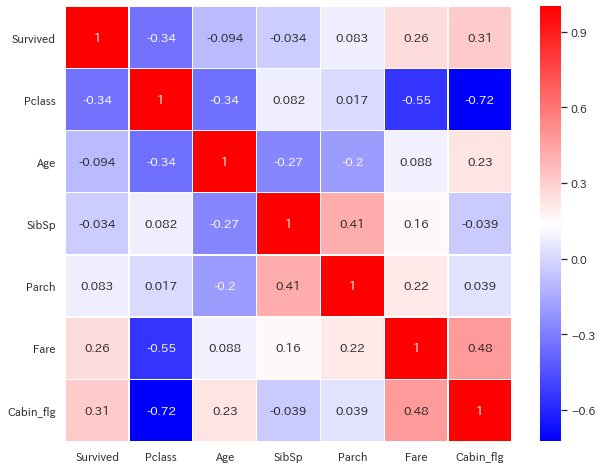

In [0]:
# 相関行列の可視化(ヒートマップ)
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 2.3 データの前処理

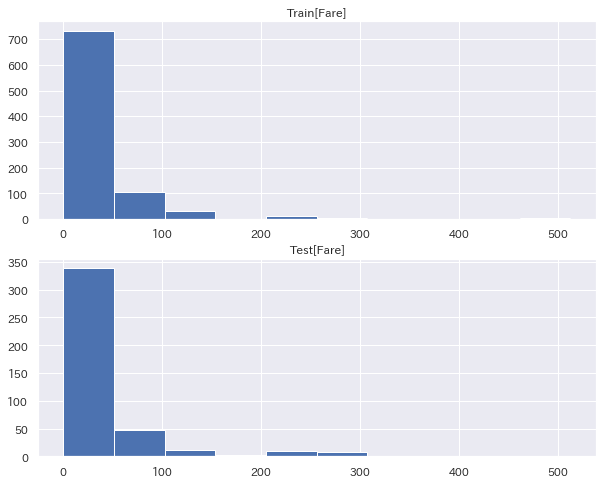

In [0]:
# 'Fare'の分布を確認
plt.figure(figsize=(10,8))
x = df['Fare']
plt.grid(True)
plt.subplot(2,1,1)
plt.title('Train[Fare]')
plt.hist(x)

plt.subplot(2,1,2)
plt.title('Test[Fare]')
test_x = df_test['Fare'].dropna()
plt.hist(test_x)
plt.show()

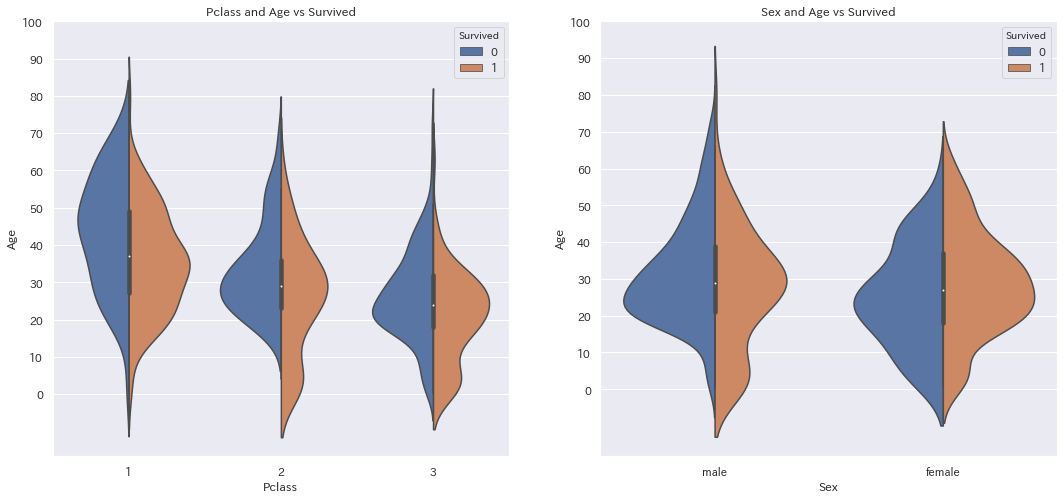

In [0]:
# Ageの特徴を確認(バイオリン図：例.人口推計の男女別年齢分布)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

【年齢の考察】<br>
・男性の幼年層：10歳以下の男性は生存率が著しく高い。 AgeとFareは数値データ平均値で補完。 <br>
→10歳以下のデータ、60歳以上のデータで整理 cf:https://kiwi-english.net/22784

In [0]:
# 10才以下のデータ取得
df[df['Age']<11].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_flg
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,0
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,0
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,0
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,0


In [0]:
# 60才以上のデータ取得
df[df['Age']>59].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_flg
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,1
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,1
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,0
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,0
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,1


Pythonの正規表現より：https://note.nkmk.me/python-re-match-search-findall-etc/

※Ageに関してはNameに含まれる'Miss'と'Mrs'という敬称別で年齢平均補完

In [0]:
# Title項目を追加(Mr, Mrs, Miss, Master, Other)
# Trainデータ
import re
def change(v):
  df = re.search(r'Mr\.|Mrs\.|Miss\.|Master\.', v)
  if df != None:
    return df.group()

df['Title']= [change(v) for v in df['Name']]
df['Title'].fillna('Other', inplace=True)

# Testデータ
import re
def change(v):
  df_test = re.search(r'Mr\.|Mrs\.|Miss\.|Master\.', v)
  if df_test != None:
    return df_test.group()

df_test['Title']= [change(v) for v in df_test['Name']]
df_test['Title'].fillna('Other', inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_flg,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr.


In [0]:
# 'Age'の欠損を上記の年齢の平均値で補完
# Trainデータ
for v in ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Other']:
  df['Age'][df['Title']==v] = df['Age'].fillna(df[df['Title']==v]['Age'].mean())

# Testデータ
for v in ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Other']:
  df_test['Age'][df_test['Title']==v] = df_test['Age'].fillna(df_test[df_test['Title']==v]['Age'].mean())
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_flg,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S,0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,Mr.


In [0]:
# 敬称ごとの年齢の平均値を取得
# Trainデータ
print('Masterの平均値(Train) : {:.2f}'.format(df[df['Title']=='Master.']['Age'].mean()))
print('Missの平均値(Train) : {:.2f}'.format(df[df['Title']=='Miss.']['Age'].mean()))
print('Mrの平均値(Train) : {:.2f}'.format(df[df['Title']=='Mr.']['Age'].mean()))
print('Mrsの平均値(Train) : {:.2f}'.format(df[df['Title']=='Mrs.']['Age'].mean()))
print('Otherの平均値(Train) : {:.2f}'.format(df[df['Title']=='Other']['Age'].mean()))
print('========================')
# Testデータ
print('Masterの平均値(Test) : {:.2f}'.format(df_test[df_test['Title']=='Master.']['Age'].mean()))
print('Missの平均値(Test) : {:.2f}'.format(df_test[df_test['Title']=='Miss.']['Age'].mean()))
print('Mrの平均値(Test) : {:.2f}'.format(df_test[df_test['Title']=='Mr.']['Age'].mean()))
print('Mrsの平均値(Test) : {:.2f}'.format(df_test[df_test['Title']=='Mrs.']['Age'].mean()))
print('Otherの平均値(Test) : {:.2f}'.format(df_test[df_test['Title']=='Other']['Age'].mean()))

Masterの平均値(Train) : 4.57
Missの平均値(Train) : 21.77
Mrの平均値(Train) : 32.37
Mrsの平均値(Train) : 35.90
Otherの平均値(Train) : 42.38
Masterの平均値(Test) : 7.41
Missの平均値(Test) : 21.77
Mrの平均値(Test) : 32.00
Mrsの平均値(Test) : 38.90
Otherの平均値(Test) : 43.83


Cabin：欠損しているかしていないかでデータ整理<br>
np.where⇒https://note.nkmk.me/python-numpy-where/

In [0]:
# Cabinのデータの有無で生存を確認
df['Cabin_flg']= np.where(df['Cabin'].isnull(), 0,1)
print(df.groupby('Survived')['Cabin_flg'].value_counts())

Survived  Cabin_flg
0         0            481
          1             68
1         0            206
          1            136
Name: Cabin_flg, dtype: int64


In [0]:
print('生存率(Cabin):{:.2f}'.format(136/(206+136)))
print('生存率(Without Cabin):{:.2f}'.format(68/(481+68)))

生存率(Cabin):0.40
生存率(Without Cabin):0.12


【考察】
・Cabinデータあるほうが生存率が高い

In [0]:
# Cabinデータがあるかどうかを２つに分類して欠損を補完
# Testデータ
df_test['Cabin_flg']= np.where(df_test['Cabin'].isnull(), 0,1)

In [0]:
# 'Embarked'の欠損を削除(Trainデータ欠損値2件しかないため。Testデータは全部ある。)
df.dropna(subset=['Embarked'], inplace=True)

In [0]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_flg        0
Title            0
dtype: int64

In [0]:
# Testデータ　'Fare'の欠損データを抽出
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_flg
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr.,0


In [0]:
# 'Fare'の欠損を対象データの'Pclass'の平均値で補完（ヒートマップより）
df_test['Fare'].fillna(df_test[df_test['Pclass']==3]['Fare'].mean(),inplace=True)
df_test[df_test['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_flg
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.459678,NaN,S,Mr.,0


In [0]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Cabin_flg        0
dtype: int64

In [0]:
# 使用しない特徴量を削除
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Embarked：One-Hot Encoding。カテゴリカルデータを0と1に変換する手法。<br>
→Sex&Embarked

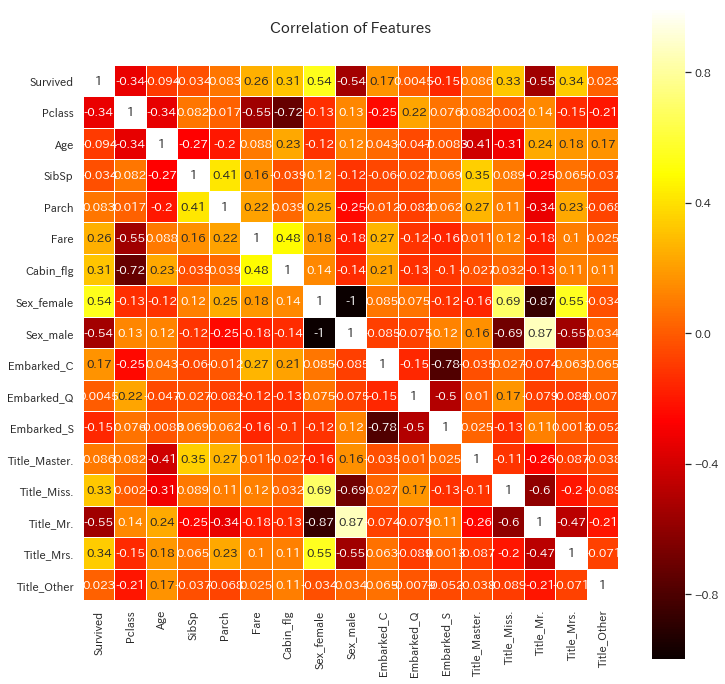

In [0]:
# ヒートマップで特徴量の相関を確認
df_dummies=pd.get_dummies(df)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df_dummies.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap='hot', linecolor='white', annot=True)

##3.　ベースラインモデルの構築

In [0]:
# 目的変数と説明変数を設定
y = df['Survived']
X = df.drop(['Survived', 'Title'], axis=1)
X_dummies = pd.get_dummies(X)
X_dummies

,Pclass,Age,SibSp,Parch,Fare,Cabin_flg,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,1,0,1,0,0
2,3,26.000000,0,0,7.9250,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,1,0,0,0,1
888,3,21.773973,1,2,23.4500,0,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,1,1,0,0


In [0]:
# Trainデータの分割
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, stratify=y, test_size=0.3, random_state=0)

# 複数のアルゴリズムでモデルを生成
models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(random_state=0),
    'tree': DecisionTreeClassifier(random_state=0),
    'LinearSVC': LinearSVC(random_state=0),
    'SVC': SVC(random_state=0),
    'RandomForest': RandomForestClassifier(random_state=0)
}
 
scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')]= model.score(X_train, y_train)
    scores[(model_name, 'test')]= model.score(X_test, y_test)

pd.Series(scores).unstack()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,test,train
LinearSVC,0.808989,0.782958
RandomForest,0.838951,0.991961
SVC,0.677903,0.683280
knn,0.752809,0.774920
logistic,0.831461,0.790997
tree,0.794007,0.991961


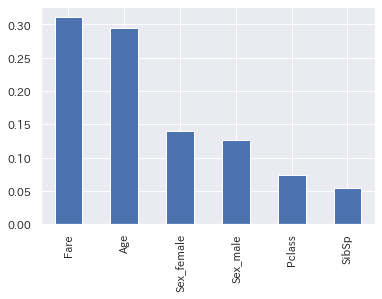

In [0]:
# 特徴量の重要度をグラフ化
s = pd.Series(models['RandomForest'].feature_importances_, index=X_dummies.columns)
s.sort_values(ascending=False).plot.bar()

In [0]:
# 重要度0.05以上のみを説明変数に代入
y = df['Survived']
X = df[['Fare', 'Age', 'Pclass', 'Sex', 'SibSp']]
X_dummies = pd.get_dummies(X)
X_dummies

,Fare,Age,Pclass,SibSp,Sex_female,Sex_male
0,7.2500,22.000000,3,1,0,1
1,71.2833,38.000000,1,1,1,0
2,7.9250,26.000000,3,0,1,0
3,53.1000,35.000000,1,1,1,0
4,8.0500,35.000000,3,0,0,1
...,...,...,...,...,...,...
886,13.0000,27.000000,2,0,0,1
887,30.0000,19.000000,1,0,1,0
888,23.4500,21.773973,3,1,1,0
889,30.0000,26.000000,1,0,0,1


In [0]:
# Trainデータの分割
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, stratify=y, test_size=0.3, random_state=0)

# モデルの生成
models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(random_state=0),
    'tree': DecisionTreeClassifier(random_state=0),
    'LinearSVC': LinearSVC(random_state=0),
    'SVC': SVC(random_state=0),
    'RandomForest': RandomForestClassifier(random_state=0)
}
 
scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')]= model.score(X_train, y_train)
    scores[(model_name, 'test')]= model.score(X_test, y_test)

pd.Series(scores).unstack()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,test,train
LinearSVC,0.794007,0.760450
RandomForest,0.838951,0.988746
SVC,0.677903,0.683280
knn,0.756554,0.782958
logistic,0.842697,0.784566
tree,0.805243,0.988746


## 4.　ハイパーパラメータ:グリッドサーチ
https://www.sejuku.net/blog/64374

In [0]:
# ハイパーパラメータの設定
pram_grid={'max_depth':range(2,10), 'n_estimators':[5, 10, 20, 30, 50, 100, 300]}
rf=RandomForestClassifier(random_state=0)
grid_search=GridSearchCV(rf, pram_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Score(Test):{:.2f}'.format(grid_search.score(X_test, y_test)))
print('Best prams:{}'.format(grid_search.best_params_))

Score(Test):0.85
Best prams:{'max_depth': 5, 'n_estimators': 10}


In [0]:
# パラメータを設定してモデルを実装
rf=RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
print('score(train):{}'.format(rf.score(X_train, y_train)))
print('score(test):{}'.format(rf.score(X_test, y_test)))

score(train):0.842443729903537
score(test):0.850187265917603


In [0]:
# Testデータの説明変数を設定
X_test= df_test[['Fare', 'Age', 'Pclass', 'Sex','SibSp']]
X_test_dummies=pd.get_dummies(X_test)
X_test_dummies

,Fare,Age,Pclass,SibSp,Sex_female,Sex_male
0,7.8292,34.500000,3,0,0,1
1,7.0000,47.000000,3,1,1,0
2,9.6875,62.000000,2,0,0,1
3,8.6625,27.000000,3,0,0,1
4,12.2875,22.000000,3,1,1,0
...,...,...,...,...,...,...
413,8.0500,32.000000,3,0,0,1
414,108.9000,39.000000,1,0,1,0
415,7.2500,38.500000,3,0,0,1
416,8.0500,32.000000,3,0,0,1


## 5.　予測の出力と提出

In [0]:
# 予測
predict = rf.predict(X_test_dummies)

In [0]:
 # 提出形式
submission = pd.read_csv('gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
submission['Survived'] = predict
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
submission.to_csv('submission.csv', index=False)